In [20]:
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

# US

## Categorise News Articles

In [3]:
us_total = pd.read_json('c4_US.json').reset_index(drop = True)

In [4]:
us_total.head()

,text,timestamp,url,cities_list,states_list,countries_list,country_name,country_code
0,Cumberland County Prosecutor’s Office says rem...,2019-04-18 13:05:03,https://www.thedailyjournal.com/story/news/loc...,"[{'score': 4, 'featureCode': 'PPL', 'stateGeoN...","[{'score': 9, 'featureCode': 'ADM1', 'stateGeo...","[{'score': 12, 'featureCode': 'PCLI', 'stateGe...",United States,US
1,War? . . . what war?\nDoes it seem like we are...,2019-04-18 21:00:27,https://www.texasgopvote.com/war-what-war-00116,"[{'score': 1, 'featureCode': 'PPLA2', 'stateGe...","[{'score': 3, 'featureCode': 'ADM1', 'stateGeo...","[{'score': 3, 'featureCode': 'PCLI', 'stateGeo...",United States,US
2,The new Wilford Hall Ambulatory Surgical Cente...,2019-04-18 22:59:58,https://www.59mdw.af.mil/NewWHASC/,"[{'score': 2, 'featureCode': 'PPLA2', 'stateGe...","[{'score': 4, 'featureCode': 'ADM1', 'stateGeo...","[{'score': 4, 'featureCode': 'PCLI', 'stateGeo...",United States,US
3,WASHINGTON -- The co-founder of a Washington o...,2019-04-18 14:55:29,https://www.cbsnews.com/news/senate-judiciary-...,"[{'score': 2, 'featureCode': 'PPLC', 'stateGeo...","[{'score': 2, 'featureCode': 'ADM1', 'stateGeo...","[{'score': 2, 'featureCode': 'PCLI', 'stateGeo...",United States,US
4,His nomination has been in the works for month...,2019-04-18 10:56:52,https://www.miamiherald.com/news/politics-gove...,"[{'score': 1, 'featureCode': 'PPLC', 'stateGeo...","[{'score': 2, 'featureCode': 'ADM1', 'stateGeo...","[{'score': 4, 'featureCode': 'PCLI', 'stateGeo...",United States,US


In [28]:
tokenizer = AutoTokenizer.from_pretrained('mrm8488/bert-mini-finetuned-age_news-classification', add_special_tokens=True, model_max_length=512, truncation=True, padding="max_length")

In [29]:
classifier_pipe = pipeline("text-classification", model = 'mrm8488/bert-mini-finetuned-age_news-classification', tokenizer=tokenizer,device = 0)

In [31]:
news_tag, news_tag_confid = [], []

for text in tqdm(us_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

us_total['news tag'] = news_tag
us_total['news tag confidence'] = news_tag_confid

100%|██████████| 213331/213331 [33:11<00:00, 107.10it/s]


In [32]:
us_total['news tag'].value_counts()

Sci/Tech    140027
Business     34789
Sports       31376
World         7139
Name: news tag, dtype: int64

In [33]:
focus_tags = us_total['news tag'].value_counts()['World'] + us_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 41928


Text(0.5, 1.0, 'Breakdown of Articles about US')

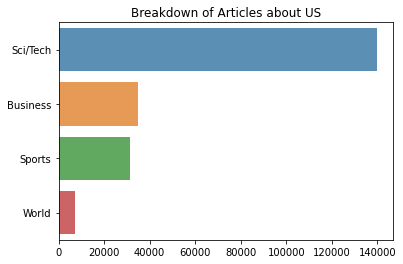

In [34]:
# us_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = us_total['news tag'].value_counts().index, x = us_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about US')

In [35]:
# Drop Sci/Tech and Sports tagged articles

# india_total = india_total[(india_total['news tag'] == 'World') | (india_total['news tag'] == 'Business')]
# print(india_total.shape[0] == focus_tags)

## Sentiment Analysis

In [36]:
tokenizer1 = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english', add_special_tokens=True, model_max_length=512, truncation=True, padding="max_length")

In [37]:
sentiment_analyser = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english", tokenizer=tokenizer1,device = 0)

In [38]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(us_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

us_total['SA tag'] = SA_tag
us_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 213331/213331 [4:03:02<00:00, 14.63it/s]


In [39]:
us_total['SA tag'].value_counts()

POSITIVE    155700
NEGATIVE     57631
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about US')

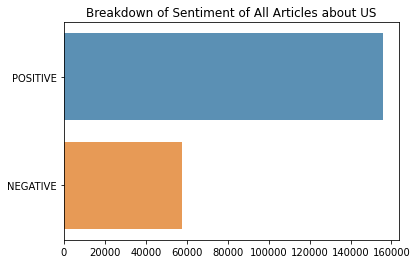

In [40]:
sns.barplot(y = us_total['SA tag'].value_counts().index, x = us_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about US')

In [41]:
us_total.to_json('c4_US_features_extracted.json')

# GB

## Categorise News Articles

In [42]:
gb_total = pd.read_json('c4_GB.json').reset_index(drop = True)


In [43]:
news_tag, news_tag_confid = [], []

for text in tqdm(gb_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

gb_total['news tag'] = news_tag
gb_total['news tag confidence'] = news_tag_confid

100%|██████████| 36150/36150 [02:55<00:00, 205.94it/s]


In [ ]:
gb_total['news tag'].value_counts()

World       298086
Business     55810
Sci/Tech     28392
Sports       17477
Name: news tag, dtype: int64

In [ ]:
focus_tags = gb_total['news tag'].value_counts()['World'] + gb_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 353896


Text(0.5, 1.0, 'Breakdown of Articles about India')

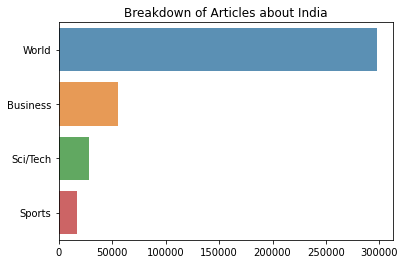

In [ ]:
# gb_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = gb_total['news tag'].value_counts().index, x = gb_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about GB')

## Sentiment Analysis

In [44]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(gb_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

gb_total['SA tag'] = SA_tag
gb_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 36150/36150 [39:15<00:00, 15.35it/s]


In [ ]:
gb_total['SA tag'].value_counts()

NEGATIVE    200925
POSITIVE    198840
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about India')

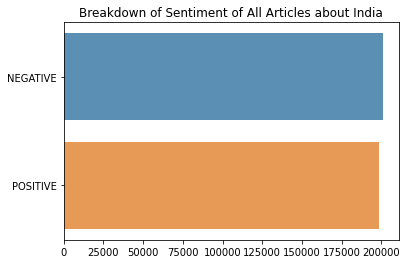

In [ ]:
sns.barplot(y = gb_total['SA tag'].value_counts().index, x = gb_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about GB')

In [45]:
gb_total.to_json('c4_GB_features_extracted.json')

# IN

## Categorise News Articles

In [46]:
in_total = pd.read_json('c4_IN.json').reset_index(drop = True)

In [47]:
news_tag, news_tag_confid = [], []

for text in tqdm(in_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

in_total['news tag'] = news_tag
in_total['news tag confidence'] = news_tag_confid

100%|██████████| 12466/12466 [01:02<00:00, 199.00it/s]


In [ ]:
in_total['news tag'].value_counts()

World       298086
Business     55810
Sci/Tech     28392
Sports       17477
Name: news tag, dtype: int64

In [ ]:
focus_tags = in_total['news tag'].value_counts()['World'] + in_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 353896


Text(0.5, 1.0, 'Breakdown of Articles about India')

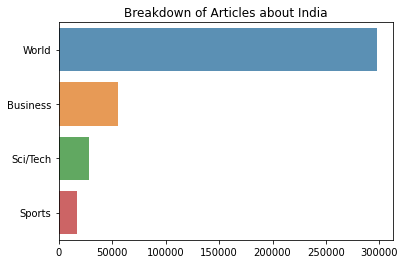

In [ ]:
# in_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = in_total['news tag'].value_counts().index, x = in_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about IN')

## Sentiment Analysis

In [48]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(in_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

in_total['SA tag'] = SA_tag
in_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 12466/12466 [13:51<00:00, 14.99it/s]


In [ ]:
in_total['SA tag'].value_counts()

NEGATIVE    200925
POSITIVE    198840
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about India')

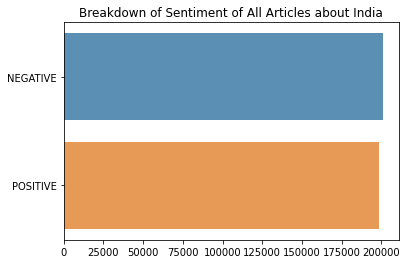

In [ ]:
sns.barplot(y = in_total['SA tag'].value_counts().index, x = in_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about IN')

In [49]:
in_total.to_json('c4_IN_features_extracted.json')